# Notebook to find avg. temp for a location

by Cascade Tuholske 2020.04.06

In [1]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#### Heat Index Data 
DATA_IN = '/home/cascade/projects/UrbanHeat/data/interim/ERA5_HI/' # output from avg temp
DATA_OUT = '/home/cascade/projects/UrbanHeat/data/processed/'
fn_list = sorted(glob.glob(DATA_IN+'*.csv'))

In [3]:
fn_list = sorted(glob.glob(DATA_IN+'*.csv'))
df_out = pd.DataFrame()

In [19]:
#### Pick a city of geography
# Cities : 12080 Hongcong, 9691 Kolkata, 8050 Bangalore, 2125 Accra, 2484 Legos, 2046 Paris
name = 'Bangalore'
location = 8050
geog = 'ID_HDC_G0'

In [20]:
 # get leap year cols from 2016
hi16 = pd.read_csv(fn_list[33]) 
cols = list(hi16.iloc[:,3:].columns)
cols = [year[5:] for year in cols]

In [21]:
cols = list(hi16.iloc[:,3:].columns)
cols = [year[5:] for year in cols]

In [22]:
temp_list = []
for i, fn in enumerate(fn_list):
    df = pd.read_csv(fn) # open data frame
    year = [(df.columns[3]).split('.')[0]] # get year
    row = df[df[geog] == location]
    temp = row.iloc[:,3:] # get only temp columns
        
    # add in col for leap years
    if temp.shape[1] == 365:
        leap = year[0]+'.02.29'
        temp.insert(loc = 59, column = '2015.02.29', value = np.nan, allow_duplicates=False)

    # Set Index & Columns
    temp.index = year
    temp.columns = cols # revalue to m.d
    
    # add to list
    temp_list.append(temp)
    #df.append(temp, sort = False)

In [23]:
df_out = pd.concat(temp_list)

In [24]:
df_out

,01.01,01.02,01.03,01.04,01.05,01.06,01.07,01.08,01.09,01.10,...,12.22,12.23,12.24,12.25,12.26,12.27,12.28,12.29,12.30,12.31
1983,26.475243,28.520203,27.813646,26.158176,25.809801,25.807948,26.375634,27.058772,27.487350,27.343317,...,19.237276,18.717882,24.818490,24.989282,25.886134,27.025472,28.506718,25.814868,26.344575,26.653615
1984,25.765389,25.298401,25.923481,25.124101,25.661509,24.964370,25.382513,24.953101,25.454699,25.855290,...,25.234715,25.370489,25.701621,26.756266,25.444683,27.675094,27.934449,26.649269,26.053721,25.100607
1985,25.555995,26.131574,26.098763,24.087469,28.457405,29.317355,29.118837,29.364455,28.489578,26.826897,...,25.529227,25.440335,25.187102,25.254717,27.555225,28.140845,28.728801,26.761799,26.603848,25.897947
1986,26.402196,26.572078,25.721513,26.157436,26.156409,25.321229,24.672022,26.171793,26.556796,26.437889,...,25.536372,26.804864,26.867600,26.479903,25.847179,21.990523,25.625471,25.692959,26.113566,26.389363
1987,25.174088,24.564021,26.105043,23.411838,25.190127,24.308186,24.993926,26.536947,26.878475,28.405603,...,23.788364,24.458900,25.385290,25.350826,25.059709,22.668978,24.769859,25.120376,24.536161,23.965749
1988,22.405492,23.663468,24.303733,25.347887,25.397511,24.765162,25.119328,25.359290,23.964874,25.084115,...,25.875130,25.760091,26.668197,26.562759,27.325339,25.437912,25.542181,24.862985,25.425081,25.868291
1989,23.511300,25.659271,26.292450,25.426837,25.963755,25.935727,24.203142,25.179078,25.564094,25.674955,...,26.206725,25.923597,26.740906,28.374702,30.198998,28.283097,26.003954,26.347455,26.909972,29.252423
1990,28.682091,26.959764,27.979552,26.314163,25.082568,22.124534,20.131501,23.975471,26.246100,27.903469,...,26.350240,26.341101,25.650876,25.278236,26.328886,24.483329,24.748305,25.012170,25.443611,26.214715
1991,26.872776,28.667768,27.131406,28.621036,26.661923,29.676385,26.760014,28.168520,27.759178,28.005241,...,26.508445,29.066271,29.461086,26.458629,26.109964,26.776420,26.728351,25.480167,26.049995,22.629503
1992,24.898474,23.919139,24.129055,25.071146,24.700777,25.173063,24.935528,26.145881,25.641639,25.453990,...,24.695476,24.781642,24.509489,24.416353,24.320506,24.875827,24.841012,25.915436,24.330076,25.465025


# Lets Plot

In [25]:
means = df_out.mean(axis = 0)
dates = list(range(1,367))

In [26]:
len(dates)

366

Text(0.5, 1.0, '1998 HI Max vs. 34-average HI, Bangalore')

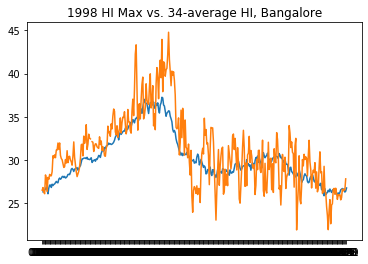

In [27]:
plt.plot(dates, means)
year = '1998'
plt.plot(df_out.loc[year])
plt.title(year+' HI Max vs. 34-average HI, '+ name)